<h1 style='background-image: url("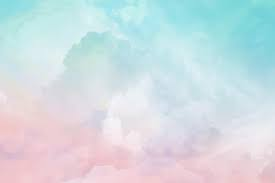");color: #008000;font-weight: bolder'>𝒦𝒶𝑔𝑔𝓁𝑒 𝒮𝑒𝓅𝓉𝑒𝓂𝒷𝑒𝓇 𝒯𝒶𝒷𝓊𝓁𝒶𝓇 𝒫𝓁𝒶𝓎𝑔𝓇𝑜𝓊𝓃𝒹</h1>


In [1]:
import pandas as pd
import numpy as np

In [54]:
data=pd.read_csv(r"\Users\Slmss\Desktop\Tabular\train.csv")
data.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [48]:
data.columns[1]

'date'

In [70]:
test=pd.read_csv(r"\Users\Slmss\Desktop\Tabular\test.csv")
test.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [72]:
test

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [75]:
dft=pd.get_dummies(test.iloc[:,[0,2,3,4]])
X=dft.values.reshape(17520,13)
# Y=data['num_sold'].values.reshape(70128,1)

In [79]:
p=pd.DataFrame(xgb.predict(X),columns=['num_sold'])
p

,num_sold
0,581.526978
1,456.962799
2,378.989868
3,584.924316
4,199.687088
...,...
17515,591.856873
17516,197.534897
17517,147.657730
17518,125.814674


In [81]:
pd.concat((test[['row_id']],p),axis=1,join='inner').to_csv(r'\Users\Slmss\Desktop\Tabular\Submission.csv',index=False)

In [74]:
dft.shape

(17520, 13)

In [82]:
df=pd.get_dummies(data.iloc[:,[0,2,3,4]])
X=df.values.reshape(70128,13)
Y=data['num_sold'].values.reshape(70128,1)

In [84]:
data.corr()

,row_id,num_sold
row_id,1.000000,0.097968
num_sold,0.097968,1.000000


In [61]:
data.iloc[:,[0,2,3,4]]

,row_id,country,store,product
0,0,Belgium,KaggleMart,Kaggle Advanced Techniques
1,1,Belgium,KaggleMart,Kaggle Getting Started
2,2,Belgium,KaggleMart,Kaggle Recipe Book
3,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,4,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...
70123,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
70124,70124,Spain,KaggleRama,Kaggle Advanced Techniques
70125,70125,Spain,KaggleRama,Kaggle Getting Started
70126,70126,Spain,KaggleRama,Kaggle Recipe Book


In [67]:
xgb=XGBRegressor(n_estimators=1000,eval_metric=mean_absolute_error)
xgb.fit(X,Y,eval_set=[(X, Y)])

[0]	validation_0-rmse:164.99657	validation_0-mean_absolute_error:135.70061
[1]	validation_0-rmse:119.41118	validation_0-mean_absolute_error:95.02068
[2]	validation_0-rmse:88.83356	validation_0-mean_absolute_error:66.63943
[3]	validation_0-rmse:68.75626	validation_0-mean_absolute_error:47.81258
[4]	validation_0-rmse:55.32671	validation_0-mean_absolute_error:35.98999
[5]	validation_0-rmse:47.03347	validation_0-mean_absolute_error:29.54566
[6]	validation_0-rmse:41.41563	validation_0-mean_absolute_error:25.41557
[7]	validation_0-rmse:38.18822	validation_0-mean_absolute_error:23.47978
[8]	validation_0-rmse:35.79715	validation_0-mean_absolute_error:22.29359
[9]	validation_0-rmse:33.95248	validation_0-mean_absolute_error:21.30370
[10]	validation_0-rmse:33.07778	validation_0-mean_absolute_error:20.90292
[11]	validation_0-rmse:31.81077	validation_0-mean_absolute_error:20.33051
[12]	validation_0-rmse:31.37824	validation_0-mean_absolute_error:20.10814
[13]	validation_0-rmse:30.85803	validation_0-

[111]	validation_0-rmse:17.28476	validation_0-mean_absolute_error:11.33526
[112]	validation_0-rmse:17.25151	validation_0-mean_absolute_error:11.30406
[113]	validation_0-rmse:17.21884	validation_0-mean_absolute_error:11.28201
[114]	validation_0-rmse:17.14496	validation_0-mean_absolute_error:11.23180
[115]	validation_0-rmse:17.09710	validation_0-mean_absolute_error:11.19588
[116]	validation_0-rmse:17.06323	validation_0-mean_absolute_error:11.16661
[117]	validation_0-rmse:16.94179	validation_0-mean_absolute_error:11.10433
[118]	validation_0-rmse:16.87020	validation_0-mean_absolute_error:11.04986
[119]	validation_0-rmse:16.79462	validation_0-mean_absolute_error:11.01107
[120]	validation_0-rmse:16.76272	validation_0-mean_absolute_error:10.98747
[121]	validation_0-rmse:16.70295	validation_0-mean_absolute_error:10.94325
[122]	validation_0-rmse:16.67540	validation_0-mean_absolute_error:10.92480
[123]	validation_0-rmse:16.66030	validation_0-mean_absolute_error:10.91481
[124]	validation_0-rmse:1

[222]	validation_0-rmse:13.55344	validation_0-mean_absolute_error:8.95100
[223]	validation_0-rmse:13.54355	validation_0-mean_absolute_error:8.94453
[224]	validation_0-rmse:13.52539	validation_0-mean_absolute_error:8.93259
[225]	validation_0-rmse:13.51117	validation_0-mean_absolute_error:8.92277
[226]	validation_0-rmse:13.50416	validation_0-mean_absolute_error:8.91807
[227]	validation_0-rmse:13.49684	validation_0-mean_absolute_error:8.91414
[228]	validation_0-rmse:13.46051	validation_0-mean_absolute_error:8.89504
[229]	validation_0-rmse:13.45412	validation_0-mean_absolute_error:8.89140
[230]	validation_0-rmse:13.44056	validation_0-mean_absolute_error:8.88188
[231]	validation_0-rmse:13.43091	validation_0-mean_absolute_error:8.87542
[232]	validation_0-rmse:13.39603	validation_0-mean_absolute_error:8.85992
[233]	validation_0-rmse:13.37607	validation_0-mean_absolute_error:8.84880
[234]	validation_0-rmse:13.35751	validation_0-mean_absolute_error:8.83625
[235]	validation_0-rmse:13.33482	valid

[333]	validation_0-rmse:11.88227	validation_0-mean_absolute_error:7.96869
[334]	validation_0-rmse:11.86758	validation_0-mean_absolute_error:7.96056
[335]	validation_0-rmse:11.86656	validation_0-mean_absolute_error:7.95962
[336]	validation_0-rmse:11.85638	validation_0-mean_absolute_error:7.95300
[337]	validation_0-rmse:11.84890	validation_0-mean_absolute_error:7.94844
[338]	validation_0-rmse:11.84843	validation_0-mean_absolute_error:7.94805
[339]	validation_0-rmse:11.84560	validation_0-mean_absolute_error:7.94613
[340]	validation_0-rmse:11.82575	validation_0-mean_absolute_error:7.93663
[341]	validation_0-rmse:11.80821	validation_0-mean_absolute_error:7.92684
[342]	validation_0-rmse:11.79347	validation_0-mean_absolute_error:7.91855
[343]	validation_0-rmse:11.77832	validation_0-mean_absolute_error:7.90940
[344]	validation_0-rmse:11.76147	validation_0-mean_absolute_error:7.90304
[345]	validation_0-rmse:11.74077	validation_0-mean_absolute_error:7.89080
[346]	validation_0-rmse:11.73678	valid

[444]	validation_0-rmse:10.91782	validation_0-mean_absolute_error:7.38726
[445]	validation_0-rmse:10.91313	validation_0-mean_absolute_error:7.38463
[446]	validation_0-rmse:10.90938	validation_0-mean_absolute_error:7.38186
[447]	validation_0-rmse:10.90898	validation_0-mean_absolute_error:7.38127
[448]	validation_0-rmse:10.90011	validation_0-mean_absolute_error:7.37526
[449]	validation_0-rmse:10.89979	validation_0-mean_absolute_error:7.37488
[450]	validation_0-rmse:10.88563	validation_0-mean_absolute_error:7.36608
[451]	validation_0-rmse:10.87877	validation_0-mean_absolute_error:7.36126
[452]	validation_0-rmse:10.87274	validation_0-mean_absolute_error:7.35813
[453]	validation_0-rmse:10.86847	validation_0-mean_absolute_error:7.35481
[454]	validation_0-rmse:10.86669	validation_0-mean_absolute_error:7.35336
[455]	validation_0-rmse:10.86184	validation_0-mean_absolute_error:7.35079
[456]	validation_0-rmse:10.85450	validation_0-mean_absolute_error:7.34598
[457]	validation_0-rmse:10.84797	valid

[555]	validation_0-rmse:10.34337	validation_0-mean_absolute_error:7.03210
[556]	validation_0-rmse:10.33635	validation_0-mean_absolute_error:7.02876
[557]	validation_0-rmse:10.33250	validation_0-mean_absolute_error:7.02615
[558]	validation_0-rmse:10.32536	validation_0-mean_absolute_error:7.02063
[559]	validation_0-rmse:10.31830	validation_0-mean_absolute_error:7.01695
[560]	validation_0-rmse:10.31698	validation_0-mean_absolute_error:7.01605
[561]	validation_0-rmse:10.30398	validation_0-mean_absolute_error:7.00859
[562]	validation_0-rmse:10.29864	validation_0-mean_absolute_error:7.00566
[563]	validation_0-rmse:10.29564	validation_0-mean_absolute_error:7.00376
[564]	validation_0-rmse:10.29483	validation_0-mean_absolute_error:7.00293
[565]	validation_0-rmse:10.29005	validation_0-mean_absolute_error:7.00006
[566]	validation_0-rmse:10.28470	validation_0-mean_absolute_error:6.99676
[567]	validation_0-rmse:10.27875	validation_0-mean_absolute_error:6.99113
[568]	validation_0-rmse:10.27848	valid

[666]	validation_0-rmse:9.92245	validation_0-mean_absolute_error:6.75624
[667]	validation_0-rmse:9.92166	validation_0-mean_absolute_error:6.75520
[668]	validation_0-rmse:9.92150	validation_0-mean_absolute_error:6.75481
[669]	validation_0-rmse:9.92080	validation_0-mean_absolute_error:6.75408
[670]	validation_0-rmse:9.91880	validation_0-mean_absolute_error:6.75243
[671]	validation_0-rmse:9.91717	validation_0-mean_absolute_error:6.75079
[672]	validation_0-rmse:9.91602	validation_0-mean_absolute_error:6.74990
[673]	validation_0-rmse:9.91378	validation_0-mean_absolute_error:6.74835
[674]	validation_0-rmse:9.90927	validation_0-mean_absolute_error:6.74547
[675]	validation_0-rmse:9.90589	validation_0-mean_absolute_error:6.74364
[676]	validation_0-rmse:9.90177	validation_0-mean_absolute_error:6.74129
[677]	validation_0-rmse:9.89620	validation_0-mean_absolute_error:6.73770
[678]	validation_0-rmse:9.88994	validation_0-mean_absolute_error:6.73444
[679]	validation_0-rmse:9.88807	validation_0-mean_a

[779]	validation_0-rmse:9.52737	validation_0-mean_absolute_error:6.50707
[780]	validation_0-rmse:9.52189	validation_0-mean_absolute_error:6.50384
[781]	validation_0-rmse:9.51867	validation_0-mean_absolute_error:6.50162
[782]	validation_0-rmse:9.51551	validation_0-mean_absolute_error:6.49961
[783]	validation_0-rmse:9.51027	validation_0-mean_absolute_error:6.49484
[784]	validation_0-rmse:9.50708	validation_0-mean_absolute_error:6.49298
[785]	validation_0-rmse:9.50281	validation_0-mean_absolute_error:6.49030
[786]	validation_0-rmse:9.50178	validation_0-mean_absolute_error:6.48963
[787]	validation_0-rmse:9.49889	validation_0-mean_absolute_error:6.48767
[788]	validation_0-rmse:9.49751	validation_0-mean_absolute_error:6.48643
[789]	validation_0-rmse:9.49658	validation_0-mean_absolute_error:6.48556
[790]	validation_0-rmse:9.49396	validation_0-mean_absolute_error:6.48346
[791]	validation_0-rmse:9.49086	validation_0-mean_absolute_error:6.48152
[792]	validation_0-rmse:9.48343	validation_0-mean_a

[892]	validation_0-rmse:9.15428	validation_0-mean_absolute_error:6.27410
[893]	validation_0-rmse:9.15267	validation_0-mean_absolute_error:6.27269
[894]	validation_0-rmse:9.15122	validation_0-mean_absolute_error:6.27180
[895]	validation_0-rmse:9.14752	validation_0-mean_absolute_error:6.26965
[896]	validation_0-rmse:9.14412	validation_0-mean_absolute_error:6.26724
[897]	validation_0-rmse:9.14029	validation_0-mean_absolute_error:6.26452
[898]	validation_0-rmse:9.13993	validation_0-mean_absolute_error:6.26404
[899]	validation_0-rmse:9.13967	validation_0-mean_absolute_error:6.26370
[900]	validation_0-rmse:9.13824	validation_0-mean_absolute_error:6.26260
[901]	validation_0-rmse:9.13684	validation_0-mean_absolute_error:6.26159
[902]	validation_0-rmse:9.13312	validation_0-mean_absolute_error:6.26009
[903]	validation_0-rmse:9.12948	validation_0-mean_absolute_error:6.25780
[904]	validation_0-rmse:9.11993	validation_0-mean_absolute_error:6.25304
[905]	validation_0-rmse:9.11549	validation_0-mean_a

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x000002F46B2029D0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [63]:
df.shape

(70128, 13)

In [51]:
df.drop((data.columns[0],data.columns[1]),axis=1).values.shape

KeyError: "[('row_id', 'date')] not found in axis"

In [28]:
X=df.drop('row_id',axis=1).values.reshape(70128,1474)
Y=data['num_sold'].values.reshape(70128,1)

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [40]:
xgb=XGBRegressor(n_estimators=100,eval_metric=mean_absolute_error)

In [41]:
xgb.fit(X,Y,eval_set=[(X, Y)])

[0]	validation_0-rmse:162.25339	validation_0-mean_absolute_error:135.69817
[1]	validation_0-rmse:113.64922	validation_0-mean_absolute_error:95.01745
[2]	validation_0-rmse:79.61236	validation_0-mean_absolute_error:66.53278
[3]	validation_0-rmse:55.77009	validation_0-mean_absolute_error:46.58770
[4]	validation_0-rmse:39.07275	validation_0-mean_absolute_error:32.62159
[5]	validation_0-rmse:27.38133	validation_0-mean_absolute_error:22.84238
[6]	validation_0-rmse:19.19579	validation_0-mean_absolute_error:15.99559
[7]	validation_0-rmse:13.46691	validation_0-mean_absolute_error:11.20148
[8]	validation_0-rmse:9.46081	validation_0-mean_absolute_error:7.84466
[9]	validation_0-rmse:6.66296	validation_0-mean_absolute_error:5.49396
[10]	validation_0-rmse:4.71297	validation_0-mean_absolute_error:3.84789
[11]	validation_0-rmse:3.35553	validation_0-mean_absolute_error:2.69796
[12]	validation_0-rmse:2.41361	validation_0-mean_absolute_error:1.89612
[13]	validation_0-rmse:1.77343	validation_0-mean_absolu

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x000002F46B2029D0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [43]:
test

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [42]:
pred=pd.DataFrame(xgb.predict(test),columns=['row_id','date','country','store','product','num_sold'])

ValueError: Feature shape mismatch, expected: 1474, got 5

In [3]:
data.tail()

,row_id,date,country,store,product,num_sold
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135
70127,70127,2020-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,202


In [4]:
data.shape

(70128, 6)

In [5]:
data.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data[['row_id','num_sold']])
scl=pd.DataFrame(sc.transform(data[['row_id','num_sold']]),columns=['row_id','num_sold'])

In [37]:
scl

,row_id,num_sold
0,-1.732026,3.693688
1,-1.731977,3.315416
2,-1.731927,2.251528
3,-1.731878,4.064079
4,-1.731829,0.360170
...,...,...
70123,1.731829,3.307536
70124,1.731878,0.163153
70125,1.731927,-0.286044
70126,1.731977,-0.467299


In [38]:
import statsmodels.formula.api as smf
model = smf.ols("num_sold~row_id",data = scl).fit()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
model.params

Intercept   -2.019218e-15
row_id       9.796847e-02
dtype: float64

In [40]:
print(model.tvalues, '\n', model.pvalues)

Intercept   -5.373002e-13
row_id       2.606874e+01
dtype: float64 
 Intercept     1.000000e+00
row_id       4.255404e-149
dtype: float64


In [41]:
(model.rsquared,model.rsquared_adj)

(0.009597822058601824, 0.009583698877785318)

In [44]:
y=pd.read_csv(r'\Users\Slmss\Desktop\Tabular\test.csv')

In [51]:
sc=StandardScaler()
sc.fit(y[['row_id']])
scl=pd.DataFrame(sc.transform(y[['row_id']]),columns=['row_id'])

In [52]:
df=pd.DataFrame(model.predict(scl['row_id']),columns=['num_sold'])

In [61]:
sc.inverse_transform(fdf)

array([[1.41972101e+09, 1.72766206e+02],
       [1.41974126e+09, 1.72768664e+02],
       [1.41976150e+09, 1.72771122e+02],
       ...,
       [1.77433883e+09, 2.15822849e+02],
       [1.77435908e+09, 2.15825307e+02],
       [1.77437932e+09, 2.15827765e+02]])

In [54]:
fdf=pd.concat((y[['row_id']],df),axis=1,join='inner')
fdf.to_csv(r'\Users\Slmss\Desktop\Tabular\Submission.csv',index=False)

In [55]:
dir(sc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_validate_data',
 'copy',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

In [104]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,RNN,Bidirectional

In [64]:
data.shape

(70128, 6)

In [94]:
X=data[['row_id']].values
Y=data[['num_sold']].values
X=X.reshape(70128,1,1)
Y=Y.reshape(70128)

In [83]:
Y.shape,X.shape

((70128,), (1, 70128, 1))

In [84]:
X,Y

(array([[[    0],
         [    1],
         [    2],
         ...,
         [70125],
         [70126],
         [70127]]], dtype=int64),
 array([663, 615, 480, ..., 158, 135, 202], dtype=int64))

In [112]:
nn=Sequential()
nn.add(LSTM(500,activation='relu',input_shape=(1,1),return_sequences=True))

for i in range(10):
    nn.add(LSTM(500,activation='relu',return_sequences=True))

nn.add(LSTM(50,activation='relu'))


Epoch 1/100
2192/2192 [==============================] - 134s 59ms/step - loss: 555743.0625
Epoch 2/100
2192/2192 [==============================] - 107s 49ms/step - loss: 126990.1172
Epoch 3/100
2192/2192 [==============================] - 106s 48ms/step - loss: 23666.9707
Epoch 4/100
2192/2192 [==============================] - 109s 50ms/step - loss: 23702.6543
Epoch 5/100
2192/2192 [==============================] - 109s 50ms/step - loss: 44415.1289
Epoch 6/100
2192/2192 [==============================] - 106s 48ms/step - loss: 51610.9922
Epoch 7/100
2192/2192 [==============================] - 117s 54ms/step - loss: 50787.3086
Epoch 8/100
2192/2192 [==============================] - 108s 49ms/step - loss: 49983.7500
Epoch 9/100
2192/2192 [==============================] - 108s 49ms/step - loss: 49191.8633
Epoch 10/100
2192/2192 [==============================] - 107s 49ms/step - loss: 48409.3086
Epoch 11/100
2192/2192 [==============================] - 114s 52ms/step - loss: 47636.

2192/2192 [==============================] - 129s 59ms/step - loss: 16414.8379
Epoch 91/100
2192/2192 [==============================] - 129s 59ms/step - loss: 16370.4678
Epoch 92/100
2192/2192 [==============================] - 128s 59ms/step - loss: 16331.4258
Epoch 93/100
2192/2192 [==============================] - 128s 58ms/step - loss: 16296.7812
Epoch 94/100
2192/2192 [==============================] - 128s 59ms/step - loss: 16266.7432
Epoch 95/100
2192/2192 [==============================] - 132s 60ms/step - loss: 16240.5186
Epoch 96/100
2192/2192 [==============================] - 134s 61ms/step - loss: 16218.0332
Epoch 97/100
2192/2192 [==============================] - 134s 61ms/step - loss: 16199.0908
Epoch 98/100
2192/2192 [==============================] - 134s 61ms/step - loss: 16183.2588
Epoch 99/100
2192/2192 [==============================] - 135s 62ms/step - loss: 16170.0020
Epoch 100/100
2192/2192 [==============================] - 136s 62ms/step - loss: 16158.7080


In [113]:
nn.save('first.h5')

INFO:tensorflow:Assets written to: firsth5\assets


In [ ]:
nn.save('fibrst.h5')

In [ ]:
nn.add(Dense(1))
nn.compile(loss='mse',optimizer='adam')
nn.fit(X,Y,epochs=100)

In [114]:
nn.fit(X,Y,epochs=10000)

Epoch 1/10000
2192/2192 [==============================] - 130s 59ms/step - loss: 16149.1162
Epoch 2/10000
2192/2192 [==============================] - 132s 60ms/step - loss: 16141.1504
Epoch 3/10000
2192/2192 [==============================] - 131s 60ms/step - loss: 16134.4355
Epoch 4/10000
2192/2192 [==============================] - 129s 59ms/step - loss: 16128.7607
Epoch 5/10000
2192/2192 [==============================] - 129s 59ms/step - loss: 16124.1250
Epoch 6/10000
2192/2192 [==============================] - 129s 59ms/step - loss: 16120.2979
Epoch 7/10000
2192/2192 [==============================] - 131s 60ms/step - loss: 16117.1348
Epoch 8/10000
2192/2192 [==============================] - 130s 59ms/step - loss: 16114.5166
Epoch 9/10000
2192/2192 [==============================] - 131s 60ms/step - loss: 16112.3135
Epoch 10/10000
2192/2192 [==============================] - 129s 59ms/step - loss: 16110.4756
Epoch 11/10000
2192/2192 [==============================] - 130s 59ms

KeyboardInterrupt: 

In [107]:
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_6 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
2192/2192 [==============================] - 9s 3ms/step - loss: 34067.0391
Epoch 2/100
2192/2192 [==============================] - 7s 3ms/step - loss: 23447.0703
Epoch 3/100
2192/2192 [==============================] - 7s 3ms/step - loss: 730615.5625
Epoch 4/100
2192/2192 [==============================] - 8s 4ms/step - loss: 2011103.7500
Epoch 5/100
2192/2192 [==============================] - 7s 3ms/step - loss: 28749.9824
Epoch 6/100
2192/2192 [==============================] - 8s 4ms/step - loss: 97647.6641
Epoch 7/100
2192/2192 [==============================] - 8s 4ms/step - loss: 23125.5664
Epoch 8/100
2192/2192 [==============================] - 8s 4ms/step - loss: 47468.6250
Epoch 9/100
2192/2192 [==============================] - 8s 4ms/step - loss: 24347.4355
Epoch 10/100
2192/2192 [==============================] - 8s 4ms/step - loss: 115891.7031
Epoch 11/100
2192/2192 [==============================] - 8s 4ms/step - loss: 25956.8633
Epoch 12/100
2192/2192 [==

KeyboardInterrupt: 